# S1: Regresión Lineal III

## Introducción

Un modelo de regressión es un modelo que describe la relacion entre dos, o más, variables. Especificamente como una(s) de esta(s) variables, denominadas **variables independientes**, influyen en las variaciones de otra variable, denominada **variable dependiente**.

Supongamos queremos encontrar un modelo de regresion que nos permita estimar cual es el precio por metro cuadrado de una vivienda usando como variable observable la edad de la misma. Para poder construir este modelo necesitamos de un conjunto de datos historicos que relacionen el precio de la vivienda e indiquen su área. Para este ejemplo utilizaremos la base de datos 
*Residential Building Data Set*, la cual puede ser encontrada en el UCI repository en este [link](https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set). Empecemos por cargar y observar los datos.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import pinv

%matplotlib inline

In [ ]:
# !pip install openpyxl

In [9]:
# Cargando el archivo de excel con los datos
data = pd.read_excel('Real estate valuation data set.xlsx')
data.shape

(414, 8)

In [3]:
# Observando los datos
data.head(10)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.666667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.666667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.416667,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2013.500000,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013.416667,17.9,1783.18000,3,24.96731,121.51486,22.1


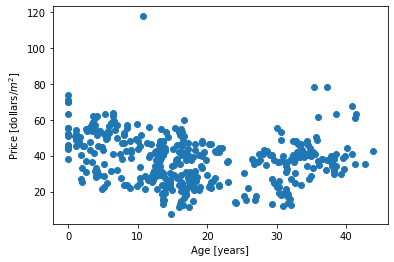

In [4]:
# Graficando las variables de interes
plt.scatter(data['X2 house age'], data['Y house price of unit area'])
plt.xlabel('Age [years]')
plt.ylabel('Price [dollars/$m^2$]')
plt.show()

## Regresión Lineal Simple

Vamos a suponer que el modelo que queremos encontrar es un modelo lineal de la forma $ h_\theta(x) = \theta_0+\theta_1x$. Donde $x$ representa la variable independiente, que en este caso sería la antiguedad de la vivienda, y $h_\theta(x)$ es el modelo (o hipótesis) que depende de los paramétros $\theta:\{\theta_0,\theta_1\}$. Este modelo se puede interpretar como una función que mapea los datos de entrada $x$ a valores en $y$. En este caso $y$ es la variable dependiente, y representa el precio por $\text{m}^2$ de la vivienda. El problema ahora radica en encontrar los valores  de los parámetros $\theta$ que de acuerdo a una métrica dada son capaces de realizar predicciones acertadas.

Antes de continuar definamos cierta nomenclatura para poder guiarnos a lo largo de la clase:

1. los escalares seran representados por medio de variables tal como $x$ y $y$
2. El número de observaciones que se tienen se denominara $m$
3. $(x^{(i)},y^{(i)})$ representa la $i$-ésima observación.

## Función de Costo

La idea general para solucionar el problema de regresión planteado en la sección anterior, es: encontrar los parámetros $\theta$ tal que $h_\theta(x)$ produce valores cercanos a $y$ para el conjunto de entrenamiento $(x,y)$.

**Pregunta:** Dado un valor de entrada $x$, ¿Cómo puedo medir que tan cercano de $y$ son los valores que obtengo con $h_\theta(x)$?

**Solución:** Existen muchas formas de medir esta distancia, se puede usar la distancia euclídiana, u otro tipo de métrica que me permita medir distancias. Sin embargo, una de las más utilizadas es el *error cuadratico medio (Mean Least Squares)*.

### Error Cuadrático Medio

En nuestro problema de regresión el error cuadrático medio se define cómo:

$$e_{LS}(\theta)=\frac{1}{m}\sum_{i=1}^{m}[h_\theta(x^{(i)})-y^{(i)}]^2.$$

Una **función de costo** es una función que me indica cual es el costo que incurre el modelo por seleccionar un conjunto de parametros $\theta$. La función de costo para nuestro problema de regresión será el error cuadrático medio. Tradicionalmente la función de costo se expresa con la letra $J$. De esta forma, el problema de regresión se enfoca en encontrar el conjunto de parametros $\theta$ que minimiza la función de costo, o en otras palabras se debe solucionar:

$$ \min_{\theta_0,\theta_1}J(\theta_0,\theta_1) $$

$$ \begin{equation}
   \begin{split}
      s.t.  \quad & J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\left[h_\theta(x^{(i)})-y^{(i)}\right]^2,\\
            \quad & h_\theta(x) = \theta_0+\theta_1x
   \end{split}
   \end{equation}$$

### ¿Cómo luce la función de costo con múltiple variables?

En este caso nuestra función de costo es convexa, lo cual implica que podemos encontrar un mínimo global, la forma de está función de costo es un paraboloide, como se muestra en la siguiente figura.

![title](img/Cost_Contour.png)

Ahora tratemos de ubicar cual es el valor de la funcion de costo para diferentes parámetros, así mismo como la salida del modelo.

![title](img/Cost_Contour_Test.png)

**Pregunta:** <font color='green'> Suponga que para diferentes combinaciones de parámetros ${\theta_0, \theta_1}$ al ubicar el costo estos se encuentran sobre el mismo contorno, ¿Qué podemos concluir? </font>

**Solución:** Si esto sucede, esto significa que para todas estas combinaciones de parámetros el error de predicción del modelo es el mismo. Es decir, esas combinaciones de parámetros producen el mismo costo.

## Aprendizaje de los Parámetros

En esta sección estudiaremos dos formas para poder _"aprender"_ cuales son los parámetros óptimos de nuestro modelo de regresión lineal. El pimer método es _algebraico_ y el segundo método es un algoritmo de búsqueda utilizando técnicas de optimización.

### Soluciones de Forma Canónica

El probrema de regresión lineal planteado en este ejercicio posee una solución canónica. Esto se debe a la forma de la superficie del error (Función de costo). Antes de continuar, para poder entender la relación entre el problema y el álgebra lineal, extendamos un poco la notación que hemos usado hasta el momento:

1. Todos los vectores que trabajaremos son vectores columna y se representaran por letras minúsculas en negrita.
2. El vector $\mathbf{x}=[x^{(1)},\ldots,x^{(m)}]^T$ es un vector que contiene todas las $m$ observaciones de la variable independiente. Este vector esta embebido en un espacio $m$-dimensional, es decir $\mathbf{x}\in\mathbb{R}^m$.
2. El vector $\mathbf{y}=[y^{(1)},\ldots,y^{(m)}]^T$ es un vector que contiene todas las observaciones de la variable dependiente, y $\mathbf{y}\in\mathbb{R}^m$.
3. El vector $\mathbf{1}_m$ es un vector columna con $m$ elementos, y todos sus elementos son unos, y $\mathbf{1}_m\in\mathbb{R}^m$
4. Las matrices se representan por medio de letras mayusculas en negrita.


Con la notación que hemos definido ahora podemos tratar de convertir todas nuestras ecuaciones en forma matricial.

**Pregunta:**  <font color='green'> Nuestro modelo esta definido por $h_\theta(x^{(i)}) = x^{(i)}*\theta_1+\theta_0$. este modelo produce por cada valor de $x$ un valor de salida. Utilizando vectores, es posible escribir esta ecuación de tal forma que se pueda encontrar la salida del modelo para varios valores $x$ en una sola operación. Plantee como quedaria este modelo utilizando producto de matrices y vectores. </font>

**Solución:** El modelo en forma matricial queda expresado como $\mathbf{h_\theta}=[\mathbf{x}\:\mathbf{1}]\boldsymbol{\theta}$, donde $\boldsymbol{\theta}=[\theta_1 \quad \theta_0]^{T}$, $\theta\in\mathbb{R}^2$. Simplificando un poco más el modelo se puede definir $\mathbf{A} = [\mathbf{x} \: \mathbf{1}]$ como la matriz de regresores, las dimensiones de esta matrix son $m\times2$, es decir $\mathbf{A}\in\mathbb{R}^{m\times2}$. De esta forma el modelo se simplifica a $\mathbf{h_\theta}=\mathbf{A}\boldsymbol{\theta}$.

Nota:
En la notación usada, la matriz de regresores $\mathbf{A} = [\mathbf{x}\:\mathbf{1}] $, es una matriz construida por los vectores columna. Esto es, con $m =2$,

$$ 
\mathbf{A} = [\mathbf{x}\:\mathbf{1}] = 
\begin{pmatrix}
x^{(1)} & 1 \\
x^{(2)} & 1
\end{pmatrix} .$$


**Pregunta:**  <font color='green'>¿Como se define la función de costo de forma matricial?</font>

**Solución:** antes de definir la funcion de costo, definamos el error de estimación $\mathbf{e}=\mathbf{A}\boldsymbol{\theta}-\mathbf{y}$, donde $\mathbf{e}\in\mathbb{R}^m$. De esta forma la función de costo estaría dada por $J(\boldsymbol{\theta}) = \frac{1}{m}\mathbf{e}^\text{T}\mathbf{e}$, donde $e^{T}$ representa la transpuesta.

#### Entendiendo la función de costo

El objetivo de la función de costo del error cuadratico medio es minimizar la magnitud del error de aproximación. Ese error esta dado por las distancias calculadas entre la predicción del modelo y las observaciones. En la siguiente gráfica se presenta de forma más intuitiva este error.

![title](img/Error_Regresion.png)

Si consideramos que el error esta embebido en un espacio $m$-dimensional, entonces cada uno de los $m$ puntos de la función de error representa el valor que debe tomar en cada una de las coordenadas de ese espacio. Por lo tanto, si quiero calcular la magnitud del error, utilizo el producto punto, ya que $||\mathbf{e}||^2=\mathbf{e}^\text{T}\mathbf{e}$.

Por otro lado, si despejamos la variable independiente de la ecuación del error obtenemos la siguiente expresion $\mathbf{y} = \mathbf{A}\boldsymbol{\theta}+\mathbf{e}$. Esta ecuación nos indica que el vector $\mathbf{y}$ se obtiene de la suma de dos vectores, uno que se encuentra embebido en el espacio de columnas de la matrix de regresores y que se calcula como $\mathbf{A}\boldsymbol{\theta}$, y otro que es el vector del error $\mathbf{e}$. Debido a que queremos minimizar el error tenemos que encontrar los parámetros $\theta$ que produzcan el error de menor magnitud posible. El vector del error de magnitud más pequeña que se puede encontrar y que conecte al vector $\mathbf{A}\boldsymbol{\theta}$ con el vector $\mathbf{y}$, es el vector que es perpendicular al espacio de columnas de $\mathbf{A}$. Es decir, al utilizar como función de costo el error cuadratico medio (la magnitud del vector de error) lo que estamos haciendo es encontrar la combinacion de parámetros $\mathbf{\theta}$ que producen la proyección ortogonal de $\mathbf{y}$ sobre el espacio de columnas de $\mathbf{A}$.

Nota: 
- ¿qué es el espacio de columnas?
- porque multiplicar en ambos lados de la ecuación por $\mathbf{x}^{T}$?

<!-- ![title](img/Proyection.png) -->
<img src="img/Proyection.png" width="500">

#### Minimizando la función de costo

Ahora procedamos a minimizar la función de costo y encontrar la solución canónica a nuestro problema de regresión.

**Pregunta:** 
<font color='green'>
si mi función de costo esta dada por $J(\boldsymbol{\theta})=\frac{1}{m}\mathbf{e}^\text{T}\mathbf{e}$, con $\mathbf{e}=\mathbf{y}-\mathbf{A}\boldsymbol{\theta}$ ¿Cuál es el valor de $\theta$ que minimiza esa función de costo?
</font>

**Solución:** La solución debe dar $\boldsymbol{\hat\theta}=\left(\mathbf{A}^\text{T}\mathbf{A}\right)^{-1}\mathbf{A}^\text{T}\mathbf{y}$. En la práctica, para evitar errores númericos, debido al mal acondicionamiento de matrices (cercanas a matrices singulares) se utiliza la pseudo-inversa, en lugar de la inversa. La pseudo inversa de la matrix $\mathbf{A}$ se define como $\mathbf{A}^+$. De esa forma, la solución esta dada por $\boldsymbol{\hat\theta}=\left(\mathbf{A}^\text{T}\mathbf{A}\right)^{+}\mathbf{A}^\text{T}\mathbf{y}$.

Nota: [Sobre la pseudo inversa](https://ocw.uc3m.es/matematicas/algebra-lineal/teoria/algebra_teoria_14.pdf) 

#### Regresión en la práctica

Ahora vamos a aplicar está solución a nuestro ejemplo base.

In [6]:
ones = np.ones((len(data),1))
x = data[['X2 house age']].values
y = data[['Y house price of unit area']].values
A = np.hstack((x,ones))

theta = ( pinv(A.T @ A) @ A.T ) @ y
print(theta)

[[-0.25148842]
 [42.43469705]]


Graficando los resultados del modelo

In [7]:
h = A @ theta

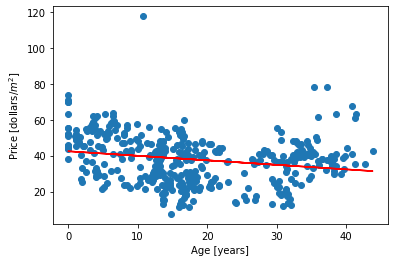

In [9]:
# Graficando las variables de interes
plt.scatter(data['X2 house age'], data['Y house price of unit area'])
plt.xlabel('Age [years]')
plt.ylabel('Price [dollars/$m^2$]')
plt.plot(x,h,'r')

FUNCIONA!!!

**Pregunta:** $\color{green}{\text{¿Qué problemas presenta la solución canonica?}}$

**Solución:** Existen dos grandes restricciones:

1. La solución canónica requiere calcular la inversa de una matrix cuadrada de dimensión $n\times n$, con $n$ el número de columnas de la matrix de regresores, lo cual es una operación del orden $\mathcal{O}(n^3)$. Por lo tanto, cuando se tienen muchos regresores, este problema tardaría mucho tiempo en resolverse y requeriria muchos recursos computacionales (memoria). Los sistemas de computo actuales pueden resolver inversas de matrices del orden $10.000 \times 10.000$ en un tiempo razonable. Sin embargo, si esto aumenta, el problema se vuelve cada vez más difícil de solucionar con los recursos computacionales actuales.

2. Esta solución canónica solamente funciona para encontrar el mínimo de la función de costo de error cuadrático medio y funciones afines. Por lo cual, sería interesante encontrar un método que permita encontrar los parámetros de una función de costo, independiente de la forma de esta función.

### Gradiente Descendiente

Debido a las limitaciones que puede tener la solución canónica del problema de regresión lineal, surge la necesidad de crear un algoritmo que se pueda utilizar independientemente si se tienen muchos regresores, o si la superficie de la función de costo no es convexa. El algoritmo más sencillo y popular que hace esta tarea es **gradiente descendiente**.

La idea general de los algortimos de optimización es la siguiente:
1. Inicializar los parámetros $\{\theta_0,\theta_1\}$
2. Continuar cambiando los parametros para reducir la función de costo $J(\theta_0,\theta_1)$ hasta que converja a un valor mínimo (se llega a un valor mínimo o se estabiliza la reducción en la función de costo).

**Nota:** Este procedimiento aplica también para funciones de costo que dependan de muchas más variables.

![item](img/Grad_Desc.jpeg)

Es importante observar que, dependiendo de la forma de la superficie de la función de costo, es posible que al inicializar el algoritmo con parámetros iniciales diferentes la función converja a otro mínimo local.

**Pregunta:** $\color{green}{\text{¿En qué dirección debo desplazar los parámetros para lograr que la función de costo disminuya?}}$ 
$\color{green}{\text{en otras palabras ¿Cómo debo cambiar los parámetros para que la función de costo disminuya?}}$

**Solución:** En la dirección contraria al gradiente de la función de costo. 

![item](img/Grad_Desc_LC.png)

Como se puede observar, la idea es actualizar los pesos en dirección contraria al gradiente de la función. Esto se expresa de la siguiente forma:

$$\theta_j := \theta_j-\alpha \frac{\partial}{\partial\theta_j}J(\boldsymbol{\theta}) $$

Donde $\boldsymbol{\theta} = [\theta_0 \: \theta_1]$, $\alpha$ se denomina la tasa de aprendizaje (o la constante de aprendizaje) y siempre $\alpha>0$, y el simbolo $:=$ representa una asignación.


Es importante tener en cuenta que al realizar este procedimiento, las asignaciones se hagan todas de una sola vez, o que primero que calculen todos los valores de actualización y después se haga la asignación. Esto sucede porque la función de costo depende de todos los parámetros, y si actualizamos uno de ellos y lo usamos para actualizar el siguiente, entonces nos estamos moviendo en la superficie de la función de costos y ya el valor del gradiente no es el mismo.

Nota: algunas veces se suele emplear la letra $\eta$ para representar la tasa de aprendizaje.

#### Intuición alrededor del Gradiente Descendiente

Supongamos que se tiene una función de costo que depende de una sola variable $\theta_1$. Entonces la ecuación de actualización del parámetro esta dada por:

$$\theta_1 := \theta_1-\alpha\frac{d}{d\theta_1}J(\theta_1)$$

**Pregunta:** <font color='green'> ¿Supongamos que nuestra funcion de costo es una parabola, ¿Explique como funciona gradient descent si al inicializar $\theta_1$ nos ubicamos a la izquierda o a la derecha del minimo. </font>

**Solución:** Independientemente de donde este ubicado el parámetro inicial siempre se actualizará en la dirección donde el minimo esta ubicado.

![title](img/GD_izq.png)
![title](img/GD_der.png)

**Preguntas:** <font color='green'> ¿Cúal es el efecto de la taza de aprendizaje en el algortimo?¿Qué sucede si es muy grande o si es muy pequeña?¿Cómo se define muy grande o muy pequeño?</font>

**Solución:** La gráfica de abajo explica la primera y la segunda pregunta. Con respecto a la tercer pregunta, depende de los datos, ela varianza de los datos de entrada influencia la derivada y está a su vez afecta el paso de actualización. Note que aunque la taza de aprendizaje se deje fija, si su valor es el adecuado el algoritmo va a converger al mínimo.

![title](img/LearningRateEffect.png)

**Pregunta:**  <font color='green'> la siguiente figura muestra la evolución de la función de costo a medida que se actualizan los valores de los parámettros. Explique por qué se le relaciona a cada curva la condición determinada de la taza de aprendizaje.</font>

<div class="alert alert-block alert-info">
<b>Nota:</b> La abcisa de la figura representa las epocas y no el parámetro que cambia, esta es una gráfica de la función de costo <i>vs</i> epoca. Una epoca se refiere a una actalización completa de todos los paramétros del modelo.
</div>

![item](img/Cost_Ephocs.png)


**Solución:** Revisar lo que sucede en las gráficas de la pregunta anterior.

**Pregunta** <font color='green'> ¿qué pasa si el parámetro se inicializa en un mínimo de la función de costo?</font>

**Solución:** El valor del parámetro no cambia, ya ha llegado al mínimo.

#### Ecuaciones del Gradiente Descendiente para la Regresión Lineal

Para calcular las ecuaciones del gradiente descendiente debemos saber cual es el valor del gradiente de la función de costo. El gradiente de la función de costo se puede establecer por la derivada parcial de la función respecto a cada parámetro:

$$\frac{\partial}{\partial\theta_j}J(\theta_0,\theta_1) = \frac{\partial}{\partial\theta_j}\frac{1}{2m}\sum_{i=1}^{m}\left[h_\theta(x^{(i)})-y^{(i)}\right]^2,$$

el número 2 que se inserta ayuda a simplificar una constante que aparece más adelante. Teniendo en cuenta que $h_\theta(x^{(i)}) = \theta_0+\theta_1x^{(i)}$, entonces las respectivas derivadas son:

$$ \begin{equation}
   \begin{split}
      \theta_0 &= \theta_0-\alpha\frac{1}{m}\sum_{i=1}^{m}\left[h_\theta(x^{(i)})-y^{(i)}\right]\\
      \theta_1 &= \theta_1-\alpha\frac{1}{m}\sum_{i=1}^{m}\left[h_\theta(x^{(i)})-y^{(i)}\right]x^{(i)}
   \end{split}
   \end{equation}$$

De la actualización se puede observar lo siguiente:
1. La actualización para $\theta_0$ trata de hacer que el error tenga media cero, entonces corrige por el offset que ocasiona este parámetro.
2. La actualización para $\theta_1$ trata de corregir la pendiente, de tal forma que el valor medio de corrección por la pendiente sea cero.

<div class="alert alert-block alert-info">
<b>Nota:</b> Este algoritmo de gradiente descendiente se conoce como <b>BATCH</b> Gradient Descent, esto significa que usa todo el conjunto de datos de entrenamiento para realizar la actualización. Algunos algoritmos usan sólo un subconjunto de los datos de entrenamiento para su actualización, esos son versiones modificadas del gradient descent.
</div>

## Regresión Lineal Multivariable

En esta sección trataremos el caso cuando tenemos varios regresores (variables independientes). Para poder continuar adicionaremos algunas definiciones a la nomenclatura:

1. m es el número de observaciones (ejemplos de entrenamiento)
2. n es el número de características (regresores)
3. $x_j^{(i)}$ es el valor de la característica (regresor) $j$ en la $i$-ésima observación.
4. $\mathbf{x}^{(i)}$ es el vector de características (regresores) de la $i-$ésima observación, y $\mathbf{x} \in \mathbb{R}^n$.
5. $\boldsymbol{\theta}$ es un vector columna con $n+1$, $\boldsymbol{\theta} \in \mathbb{R}^{n+1}$. (El $+1$ proviene del vector de unos que acompaña a $\theta_0$).

Ahora nuestro modelo contiene $n$ regresores y es de la forma:

$$h_\theta(x)= \theta_0+\theta_1x_1+\ldots+\theta_nx_n.$$

Lo cual se puede representar de forma vectorial como:

$$\mathbf{h_\theta(x)}= \mathbf{\theta}^{T}[1; \mathbf{x}].$$

Nota:

$$h_\theta(x)= \theta_0+\theta_1x_1+\ldots+\theta_nx_n =   \mathbf{\theta}^{T}[1 \quad \mathbf{x}]^{T}.$$

### Solución canónica para Regresión Lineal Multivariable

La solución para la regresión lineal múltivariable tiene la misma forma que la solución encontrada anteriormente. La única diferencia es que la matrix de regresores ahora esta formada por $\mathbf{A} = [\mathbf1_m \: \mathbf{X}]$, donde $\mathbf{X} = [\mathbf{x}^{(1)}\: \ldots\: \mathbf{x}^{(m)}]^\text{T}$.

De esta forma la solución sigue estando dada por:
$$\boldsymbol{\hat\theta}=\left(\mathbf{A}^\text{T}\mathbf{A}\right)^{+}\mathbf{A}^\text{T}\mathbf{y}.$$

Con $\boldsymbol{\hat\theta} \in \mathbb{R}^{n+1}$.

**Pregunta:** $\color{green}{\text{¿Qué sucede si hay multicolinearidad?}}$

**Nota:** Multicolinearidad significa que dos o mas columnas de la matrix de regresores son linealmente dependientes.

**Solución:** Si esto sucede, entonces, la matriz de  Gram (calculada como $A^\text{T}A$) tiene deficiencia de rango, y por lo tanto no es invertible. Esto también sucede si se tienen muchas variable de entrada y pocas observaciones $m < n$.

### Gradiente Descendiente para Regresión Lineal multivariable

Siguiendo el mismo análisis anterior, las ecuaciones de actualización par alos parámetros utilizando gradiente descendiente son:

$$ \begin{equation}
   \begin{split}
      \theta_0 &= \theta_0-\alpha\frac{1}{m}\sum_{i=1}^{m}\left[h_\theta(x^{(i)})-y^{(i)}\right]x_0^{(i)}\\
      \theta_1 &= \theta_1-\alpha\frac{1}{m}\sum_{i=1}^{m}\left[h_\theta(x^{(i)})-y^{(i)}\right]x_1^{(i)}\\
      &  \vdots\\
      \theta_n &= \theta_n-\alpha\frac{1}{m}\sum_{i=1}^{m}\left[h_\theta(x^{(i)})-y^{(i)}\right]x_n^{(i)}\\
   \end{split}
   \end{equation}$$
   
Donde $x_0^{(i)}= 1$ para todo $i$.

## $\color{orange}{\text{TAREA}}$

**Punto 1.** Para la siguiente clase realicé una implementación en python del algoritmo del gradiente descendiente. Esta implementación debe solucionar el problema de regresión que se trabajo en clase. Se debe tener en cuenta lo siguiente:

1. Debe realizar la implementación en un notebook de jupyter.
2. La implementación debe ser interactiva. Es decir, que el usuario deberia poder modificar la tasa de aprendizaje por medio de un elemento de interacción, para esto estudie la libreria _ipywidgets_.
3. Se debe hacer una gráfica de la función de costo a medida que se actualizan los parámetros, de tal forma que se pueda observar como cambia la función de costo a medida que los parámetros varían.
4. Realicé la implementación para que funcione también para regresión múltiple.

**Punto 2.** Implemente la regresion lineal multivariable para encontrar un modelo para estimar el precio de una casa utilizando como regresores las variables $X_2, X_3,$ y $X_4$. ¿Cómo puede evaluar si el modelo multivariable tiene mejores resultados que el modelo univariable?

### Comparación entre gradiente descendiente y la solución canonica


|Gradiente Descendiente | Solución canónica |
| --- | --- |
| Debe definir $\alpha$ | No hay necesidad de $\alpha$|
| Necesita muchas iteraciones | Soluciona en una sola iteración|
| $\mathcal{O}(kn^2)$ | $\mathcal{O}(n^3)$|
| Trabaja bien para valores de $n$ grandes | Trabaja lentamente (o no se puede calcular) para $n$ grande|

## Más allá de la Regresión Lineal

El modelo lineal que utilizamos en el caso de regresión lineal multivariable se peude extender para regresiones no lineales. El modelo esta expresado por:

$$h_\theta(x)= \theta_0+\theta_1x_1+\ldots+\theta_nx_n.$$

**Pregunta:** ¿Cómo se puede hacer esto?

**Solución:** EL modelo debe ser lineal en los parámetros $\theta$, por lo tanto se pueden modificar los regresores como se desee, por ejemplo se podria utilizar un modelo de la forma:

$$h_\theta(x)= \theta_0+\theta_1x_1+\theta_2x_1^2.$$

Este modelo ajustaria las mediciones $y$ a una parabola cuya variable de entrada es $x_1$. Este modelo no es un modelo lineal con respecto a la variable de entrada $x_1$, pero es lineal con respecto a los parametros $\theta$. De esa forma se puede colocar cualquier tipo de transformación no lineal a los regresores para obtener un modelo deseado.

**Pregunta:** ¿Qué significa que un modelo sea lineal?

**Solución:** Un modelo e slineal si cumple dos principios, el de superposición y el de homogeneidad, de form aresumida si:

$$h(a\theta_1+b\theta_2) = ah(\theta_1)+bh(\theta_2).$$

## Normalización

Cuando se utiliza gradiente descendiente es importante tener en cuenta la normalización de los regresores. Esto se debe, a que las variaciones de algunas columnas de la matrix de regresores pueden absorber las variaciones de otras columnas. Al normalizar se garantiza que las variaciones sean similares en todas las columnas, de esta forma la función de costo que se obtiene se acerca más a un paraboloide circular. Es importante observar que la columna de unos no se debe normalizar, ya que ésta es un valor constante. Normalizarla puede hacer que se convierta en una columna de ceros, o que no este definida, lo cual trae problemas al realizar al regresión. 

Como ejemplo consideremos el siguiente caso, inicialmente se tiene una variable $x$ que varia entre cero y 10, al realizar una grafica de la función de costo obtenemos la siguiente figura:

![item](img/Cost_not_Normalized.png)

Sin embargo, si al normalizar graficamos la función de costo obtenemos:

![item](img/Cost_Normalized.png)

Se puede observar que al normalizar la función de costo se asemeja más a un paraboloide circular.

**Pregunta:** $\color{green}{\text{¿Qué puede decir del efecto de la normalización sobre la función de costo?}}$

**Solución:** Se puede ver que la dirección de mayor variación es menos sensible a los cambios en los parámetros. Esto es debido a que los cambios serán muy pequeños en relación a la magnitud del vector. Imaginen que $\boldsymbol\theta$ esta embebido en un espacio $\mathbb{R}^{n+1}$, por lo tanto actualizar estos parámetros implica mover ese vector en este espacio, si hay una dirección que no es muy relevante (porque su magnitud es muy pequeña comparada con la del vector), entonces cualquier desplazamiento por pequeño que sea puede tener un efecto grande en esta dirección. También si se observa desde el punto de vista del gradiente descendiente, unas derivadas van a ser más eficientes que otras a la hora de realizar las actualizaciones. En sí si no se normaliza el algoritmo aun convege, solo que al normalizar se converge más rápido.

### ¿Cómo se utiliza la regresión si he normalizado?

Si se han normalizado los regresores se debe tener cuidado a la hora de producir resultados de nuestra regresión. Esto debido a que al normalizar no estamos usando los regresores tal como se midieron, por esta razón al evaluar el modelo los nuevos datos de entrada deben ser escalados de la misma forma, para garantizar que la salida es consistente. Tal como se explica en el diagrama de bloques, primero se debe realizar el entrenamiento:

![item](img/Entrenamiento.png)

Una vez se ha encontrado el conjunto de parámetros óptimo se procede a realizar la implementación del modelo:

![item](img/Prueba.png)


## Regularización

Supongamos se tiene un conjunto de datos que siguen el modelo $h(x) = 2+x+2x^2$. Este es un modelo de segundo orden, las observaciones (mediciones) que tomamos estan contaminadas por una señal aleatoria, por lo cual estas mediciones no coinciden exactamente con el valor del modelo. Un ejemplo de como lucen estos datos se encuentra en el siguiente codigo:

In [30]:
import random

# Creando un vector de numeros entre -1 y 1
x = np.linspace(-1,1,num=100)
x = x[:,np.newaxis] # volviendo el vector a columna
noise = np.random.uniform(-0.5,0.5, (100,1)) #vector de ruido
# creando el vector de mediciones, segun el modelo especificado
y = 2+x+2*x**2+noise

Text(0, 0.5, 'y variable [a.u.]')

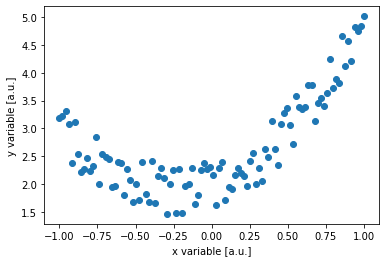

In [31]:
#graficando los datos
plt.scatter(x,y)
plt.xlabel('x variable [a.u.]')
plt.ylabel('y variable [a.u.]')

In [32]:
# no correr!
# estos regresores no son del ejemplo! corresponden a los datos de la vivienda del inicio del notebook.
# ones = np.ones((len(data),1))
# x = data[['X2 house age']].values
# y = data[['Y house price of unit area']].values
# A = np.hstack((x,ones))
# theta = ( pinv(A.T @ A) @ A.T ) @ y 

# el modelo correcto es
ones = np.ones((len(x),1))
A = np.hstack((x,ones)) 
theta = ( pinv(A.T @ A) @ A.T ) @ y # estos regresores no son del ejemplo! corresponden a los datos de la vivienda del inicio del notebook.



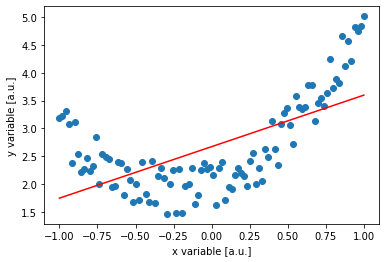

In [33]:
# Encontrando la salida
h_1 = A @ theta

# Graficando las variables de interes
plt.scatter(x, y)
plt.xlabel('x variable [a.u.]')
plt.ylabel('y variable [a.u.]')
plt.plot(x,h_1,'r');

**Pregunta:** $\color{green}{\text{¿Qué tal se ajusta el modelo a los datos?}}$

**Solución:** El modelo puede ser mucho mejor, en estos casos se dice que el modelo no es capaz de ajustarse a los datos, y que el modelo esta sub-ajustado (**Underfitting**)

**Pregunta:** $\color{green}{\text{Realice un ajuste utilizando ahora un polinomio de segundo orden, ¿mejora?}}$

**Solución:** Las ecuaciones serían estas:

In [34]:
ones = np.ones((len(x),1))
A = np.column_stack((x**2,x,ones))
theta_2 =( pinv(A.T @ A) @ A.T ) @ y
print(theta_2)

[[1.95468299]
 [0.92550044]
 [2.00727119]]


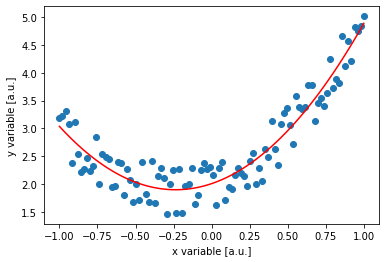

In [35]:
# Encontrando la salida
h_2 = A @ theta_2 

# Graficando las variables de interes
plt.scatter(x, y)
plt.xlabel('x variable [a.u.]')
plt.ylabel('y variable [a.u.]')
plt.plot(x,h_2,'r');

Este ajuste es mucho mejor. Este es el ajuste adecuado.

**Pregunta:** $\color{green}{\text{Qué sucede si quiero hacer el ajuste usando un polinomio de orden 10, ¿Mejorarian los resultados?}}$

**Solución** El ajuste quedaría así:

In [36]:
ones = np.ones((len(x),1))
A = np.hstack((x**10, x**9, x**8, x**7, x**6, x**5,x**4,x**3,x**2,x,ones))
theta_10 = ( pinv(A.T @ A) @ A.T ) @ y
print(theta_10)

[[-3.85593200e+01]
 [-1.59413751e+01]
 [ 9.86660482e+01]
 [ 3.70265539e+01]
 [-8.65998724e+01]
 [-2.96898730e+01]
 [ 3.01337594e+01]
 [ 9.33340518e+00]
 [-1.60261683e+00]
 [ 5.98841749e-02]
 [ 2.07871366e+00]]


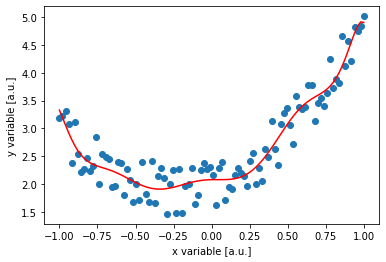

In [37]:
# Encontrando la salida
h_10 = A @ theta_10

# Graficando las variables de interes
plt.scatter(x, y)
plt.xlabel('x variable [a.u.]')
plt.ylabel('y variable [a.u.]')
plt.plot(x,h_10,'r');

Calculemos el error para los diferentes modelos

In [39]:
e_1 = (h_1-y).T @ (h_1-y)/len(x)
e_2 = (h_2-y).T @ (h_2-y)/len(x)
e_10 = (h_10-y).T @ (h_10-y)/len(x)
print("Error Cuadratico Medio del modelo lineal :",e_1)
print("Error Cuadratico Medio del modelo Cuadratico :",e_2)
print("Error Cuadratico Medio del modelo de orden 10 :",e_10)

Error Cuadratico Medio del modelo lineal : [[0.43454856]]
Error Cuadratico Medio del modelo Cuadratico : [[0.08116839]]
Error Cuadratico Medio del modelo de orden 10 : [[0.07145662]]


**Pregunta:** $\color{green}{\text{Tanto el modelo de orden 10 como el modelo del orden 2 producen un error bajo, ¿Qué modelo es mejor?}}$

**Solución:** El mejor modelo es el de orden 2, debido a varias razones:
1. El modelo de menor orden es menos complejo, se debe elegir siempre el modelo de menor complejidad
2. El modelo de orden 10 probablemente esta sobre ajustado. Es decir esta en **overfitting**, aprende muy bien de los datos de de entrenamiento pero no **generaliza**. Es decir no aprendió la estructura interna de los datos.

Para revisar el overfitting extendamos la variación de los datos en $x$ de -2 a 2. Veamos que sucede con el modelo de orden 2 y con el modelo de orden 10.

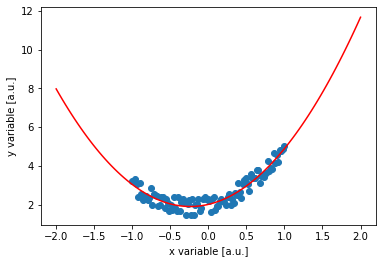

In [41]:
x_test = np.linspace(-2,2,num=100)
x_test = x_test[:,np.newaxis] # volviendo el vector a columna

A_test = np.hstack((x_test**2,x_test,ones))
h_2_test = A_test@theta_2

# Graficando las variables de interes
plt.scatter(x, y)
plt.xlabel('x variable [a.u.]')
plt.ylabel('y variable [a.u.]')
plt.plot(x_test,h_2_test,'r');

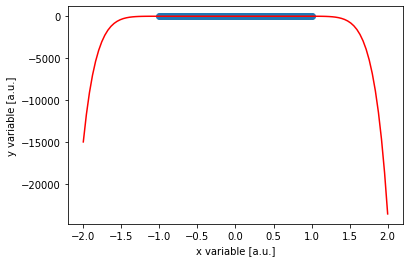

In [42]:
A_10_test = np.hstack( (x_test**10, x_test**9, x_test**8, x_test**7, x_test**6,
                        x_test**5,x_test**4,x_test**3,x_test**2,x_test,ones) )
h_10_test = A_10_test@theta_10

# Graficando las variables de interée
plt.scatter(x, y)
plt.xlabel('x variable [a.u.]')
plt.ylabel('y variable [a.u.]')
plt.plot(x_test,h_10_test,'r');

**Pregunta:** $\color{green}{\text{¿Qué modelo es mejor?}}$

**Solución:** El mejor modelo es el de orden 2, ya que este logro generalizar.

**Pregunta:** $\color{green}{\text{¿Cómo puedo controlar el overfitting durante el entrenamiento?}}$

**Solución:** Existen varias formas de controlar el overfitting:
1. Reducir el número de características (regresores) que se tienen en el modelo. (Reducir la complejidad)
    * Selección manual de cuales mantener (requiere experiencia y conocimiento del campo)
    * Selección automatica (Model selection, se vera posteriormente)
2. Usar Regularización
    * Mantiene todos los regresores, pero reduce la magnitud de los parametros $\theta$
    * Trabaja muy bien cuando todos los regresores de una u otra forma contribuyen a explicar la salida.

### Planteamiento Matemático para la Regularización

Para poder obtener una solución con unos parámetros que tengan una magnitud adecuada (pequeña) se puede modificar la función de costo de la siguiente forma:

$$J(\theta) = \frac{1}{m}\left[\sum_{i=1}^{m}\left[\mathbf{h}_{\theta}(\mathbf{x})-\mathbf{y}\right]^2 + \gamma ||\boldsymbol\theta||^2\right].$$

**Note:** Esta funcion es similar a esta otra función de costo:

$$J(\theta) = \frac{1}{m}\left[\sum_{i=1}^{m}\left[h_\theta(x^{(i)})-y^{(i)}\right]^2+\gamma\sum_{i = 1}^n\theta_i^2\right].$$

Donde $\gamma$ es la constante de regularización. Al obligar que los pesos sean pequeños, esto ocasiona que:
1. El modelo se más simple.
2. Que se reduzca la posibilidad de overfitting

**Nota:** Por convención no se penaliza $\theta_0$, pero en práctica no tiene mucho efecto.

**Pregunta:**<font color='green'>¿Qué hace $\gamma$? ¿Cómo escoger ese valor?</font>

**Solución:** Es un trade-off entre que tanto reduzco el error, frente a que tanto simplifico el modelo.

**Pregunta:** <font color='green'>Qué sucede si $\gamma$ es muy pequeño? ¿Qué sucedes si es muy grande?</font>

**Solución:** Si es muy pequeño el modelo puede quedar en overfitting, si es muy grande puede quedar en underfitting.

**Pregunta:**  <font color='green'>si mi función de costo esta dada por $J(\boldsymbol{\theta})=\frac{1}{m}\left(||\mathbf{e}||_2^2+\gamma||\boldsymbol\theta||_2^2\right)$, con $\mathbf{e}=\mathbf{y}-\mathbf{A}\boldsymbol{\theta}$ ¿Cuál es el valor de $\theta$ que minimiza esa función de costo? aquí se esta usando todos los parámetros.</font>

**Solución:** La solución esta dada por $\boldsymbol{\hat\theta}=\left(\mathbf{A}^\text{T}\mathbf{A}+\gamma\mathbf{I}\right)^{-1}\mathbf{A}^\text{T}\mathbf{y}$. Donde $\mathbf{I}$ es la matrix identidad. Esta regresión se conoce como la **Regresión de Ridge (Ridge Regressión)**. La cual es un caso especial de la regresión de Tijono (Tikhonov en ingles).

**Pregunta:** ¿Qué se puede decir de esta nueva solución?

**Solución** Se pueden decir varias cosas:
    
1. La matrix de "Gram" es invertible, regularizar relaja el problema y permite la inversión de la matriz.
2. Multicolinearidad se puede tratar (esto puede ser no deseado).

## $\color{orange}{\text{TAREA}}$

**Punto 3.** Realice la derivación de las ecuaciones de actualización cuando se usa gradiente descendiente. Recuerde qu eno se actualizará $\theta_0$ usando la regularización, pero esta si aplicara para todos los demás parámetros. El resultado al que se debe llegar es:

$$ \begin{equation}
   \begin{split}
      \theta_0 &= \theta_0-\alpha\frac{1}{m}\sum_{i=1}^{m}\left[h_\theta(x^{(i)})-y^{(i)}\right]x_0^{(i)}\\
      \theta_1 &= \theta_1-\alpha\left[\frac{1}{m}\sum_{i=1}^{m}\left[h_\theta(x^{(i)})-y^{(i)}\right]x_1^{(i)} + \frac{\gamma}{m}\theta_1\right]\\
      & \vdots\\
      \theta_n &= \theta_n-\alpha\left[\frac{1}{m}\sum_{i=1}^{m}\left[h_\theta(x^{(i)})-y^{(i)}\right]x_n^{(i)} + \frac{\gamma}{m}\theta_n\right]\\
   \end{split}
   \end{equation}$$
   
Donde $x_0^{(i)}= 1$ para todo $i$. Agrupando los parámetros quedaria:

$$\theta_n =\theta_n\left(1-\alpha\frac{\gamma}{m}\right)-\alpha\frac{1}{m}\sum_{i=1}^{m}\left(h_\theta(x^{(i)})-y^{(i)}\right)x_n^{(i)}$$

Basados en la ecuación anterior se puede observar que como $\alpha, \gamma$ y $m$ son positivos, entonces $\left(1-\alpha\frac{\gamma}{m}\right)<1$ entonces en cada paso que se realiza el parámetro $\theta_n$ es reducido. El segundo término es exactamente el mismo para el algoritmo de gradiente descendiente. Es por esta razón que al regularizar, se puede observar que en cada actualización los valores de los parámetros se disminuyen.

$\boldsymbol{\hat\theta}=\left(\mathbf{A}^\text{T}\mathbf{A}+\gamma\mathbf{I}\right)^{-1}\mathbf{A}^\text{T}\mathbf{y}$

In [43]:
### Apliquemoslo a nuestro ejemplo
ones = np.ones((len(x),1))
gamma = 2.5;
A = np.hstack((x**10, x**9, x**8, x**7, x**6, x**5,x**4,x**3,x**2,x,ones))
theta_Reg_10 = pinv(A.T@A +gamma*np.eye(11)) @ A.T @ y
print(theta_Reg_10)

[[ 0.106191  ]
 [-0.06615806]
 [ 0.16112001]
 [-0.02990412]
 [ 0.26811475]
 [ 0.04810393]
 [ 0.50225021]
 [ 0.24169701]
 [ 1.0582928 ]
 [ 0.73237868]
 [ 2.08476245]]


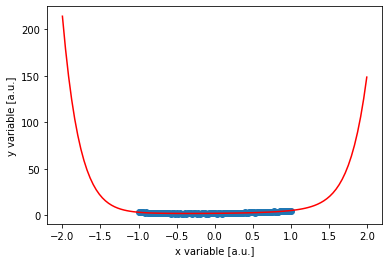

In [46]:
x_test = np.linspace(-2,2,num=100)
x_test = x_test[:,np.newaxis] # volviendo el vector a columna
A_10_test = np.hstack((x_test**10, x_test**9, x_test**8, x_test**7, x_test**6, x_test**5,x_test**4,x_test**3,x_test**2,x_test,ones))
h_10_test = A_10_test@theta_Reg_10

# Graficando las variables de interes
plt.scatter(x, y)
plt.xlabel('x variable [a.u.]')
plt.ylabel('y variable [a.u.]')
plt.plot(x_test,h_10_test,'r');

**Mucho mejor!!!**, pero no es perfecto.

## [Lectura] Un poco mas sobre Tikhonov

La forma general de la regularización de Tikhonov es la siguiente:

$$\mathbf{J}(\mathbf{x}) = ||\mathbf{A}\mathbf{x}-\mathbf{b}||_\mathbf{P}^2+||\mathbf{x}-\bar{\mathbf{x}}||_\mathbf{Q}^2$$

Donde $P$ y $Q$ son matrices de peso, que determinan que tan relevante o no es una observación, o que definen otro tipo de métrica, de forma general $||\mathbf{x}||_\mathbf{Q}^2 =\mathbf{x}^\text{T}\mathbf{Q}\mathbf{x}$, y $\bar{\mathbf{x}}$ es la media de $\mathbf{x}$. La solución a este problea esta dada por:

$$\hat{\mathbf{x}}=\left(\mathbf{A}^\text{T}\mathbf{P}\mathbf{A}+\mathbf{Q}\right)^{-1}\left(\mathbf{A}^\text{T}\mathbf{P}\mathbf{b}+\mathbf{Q}\bar{\mathbf{x}}\right),$$

o, asumiendo datos en $\mathbf{x}$ y $\mathbf{b}$ centrados:

$$\hat{\mathbf{x}}=\bar{\mathbf{x}}+\left(\mathbf{A}^\text{T}\mathbf{P}\mathbf{A}+\mathbf{Q}\right)^{-1}\left(\mathbf{A}^\text{T}\mathbf{P}\left(\mathbf{b}-\mathbf{A}\bar{\mathbf{x}}\right)\right).$$

Es importante que en la práctica tengan en cuenta que muestras y que regresores son relevantes y cuales no lo son, esa información puede incluirse en las matrices $\mathbf{P}$ y $\mathbf{Q}$.

## Otras Formas de Regularización: LASSO (Least  Absolute Shrinkage and Selection Operator)

Otra forma de regularizar es penalizando no con la magnitud del vector de parámetros, sino con su valor absoluto. De esta forma, la función de costo es:

$$J(\theta) = \frac{1}{m}\left[\sum_{i=1}^{m}\left[\mathbf{h}_{\theta}(\mathbf{x})-\mathbf{y}\right]^2 + \gamma ||\boldsymbol\theta||\right].$$

**Note:** Esta función es similar a esta otra función de costo:

$$J(\theta) = \frac{1}{m}\left[\sum_{i=1}^{m}\left[h_\theta(x^{(i)})-y^{(i)}\right]^2+\gamma\sum_{i = i}^n|\theta_i|\right].$$


Este operador no tiene solución  canónica, su solución se puede buscar utilizando gradiente descendiente. Esta regularización se conoce como *basis pursuit* (*busqueda de bases*), porque como resultado trata de llevar a cero a algunos parámetros, pero lo cual también se dice que es un regressor escaso, y puede servir para la selección de que tipo de características son útiles en el modelo.

Para poder entender porqué sucede esto, revisemos con las curvas de nivel esta función de costo:

![item](img/Regularizacion.png)

Aquí se puede ver que la función de costo de LASSO (a la izquierda) tiene una probabilidad más grande de encontrarse con las curvas de nivel del valor absoluto de los parametros en un eje, lo cual hace que la probabilidad de algunos parametros sea cero aumenta. Para Ridge no sucede lo mismo.

Se puede también cambiar esa metrica y obtener otro tipo de factores de regularización, lo cual genera unas nuevas curvas de nivel para el costo de los parámetros. Tal como se muestra en la figura de abajo.

![item](img/Metricas.png)

**Nota:** Para terminar, cuando se usa como penalización la magnitud al cuadrado del vector de parámetros, esto se conoce como la **norma-**$\mathbf{\text{L}_2}$ , así como se hace en la regresión de Ridge. LASSO por otro lado utiliza la **norma-**$\mathbf{\text{L}_1}$.

## *[Lectura] Principal Component Regression (PCR)

Suponga se tiene una regresion de la forma $\mathbf{y} = \mathbf{A}\boldsymbol{\theta}+\mathbf{e}$, hemos visto que si $\mathbf{A}$ esta cerca de ser mal acondicionada, es decir que dos o más de sus columnas estan relacionadas linealmente, esto puede traer problemas a la hora de realizar la regresión. Una forma de solucionar este problema es reduciendo el número de regresores. Sin embargo, a veces es difícil decidir si el regresor se debe o no eliminar. Otra forma de solucionar este problema es tratar de realizar una transformación en la matriz $\mathbf{A}$ de tal forma que este lejos de ser mal condicionada, la mejor forma sería representarla por medio de una matrix ortogonal. PCR lo que busca es realizar esta transformación para poder reducir los problemas debido al mal acondicionamiento de la matrix. 

Lo que PCR realiza es una transformación de la matrix $\mathbf{A}$ sobre las componentes principales de ella, obteniendo asi una base orthogonal para $\mathbf{A}$. Las componentes principales se obtienen como los eigenvectores de la matrix Gram de $\mathbf{A}$. Si asumimos que $\mathbf{A} = \mathbf{U}\boldsymbol{\Lambda}\mathbf{V}^\text{T}$ esta descomposición en valores singulares de $\mathbf{A}$, entonces $\mathbf{A}^\text{T}\mathbf{A} = \mathbf{V}\boldsymbol{\Lambda}^2\mathbf{V}^\text{T}$ y las columnas de $\mathbf{V}$  son las componentes principales, ordenadas de mayor a menor varianza explicada. De esta Forma se puede transforma la matrix $\mathbf{B} = \mathbf{A}\mathbf{V}$. Esta nueva matrix $\mathbf{B}$ es orthogonal y se encuentra bien condicionada. 

Una ventaja de PCR es que permite eliminar las direcciones (eigenvectores) que explican poco los datos (es decir cuyo valor singular es pequeño). Esto nos permite tener una representación de bajo rango de la matrix $\mathbf{A}$ y se puede interpretar como una especie de selección de características. Una vez se tiene esta nueva representación se realiza el siguiente problema de regresión usando mínimos cuadrados ordinarios.

$$\hat{\mathbf{y}} = \mathbf{B}\boldsymbol{\beta}.$$

Si observamos bien esta matrix $\mathbf{B}=\mathbf{A}\mathbf{V}=\mathbf{U}\boldsymbol{\Lambda}\mathbf{V}^\text{T}\mathbf{V} = \mathbf{U}\boldsymbol{\Lambda}$. Por lo tanto, sólo debemos encontrar la descomposición en valores singulares para $\mathbf{A}$ y como se observa la matrix $\mathbf{B}$ es orthogonal, y la solución al problema de regresión esta dada por:


$$\hat{\boldsymbol{\beta}} = (\boldsymbol{\Lambda_L})^{-1}\mathbf{U}_L^\text{T}\mathbf{y},$$

donde el subíndice $L$ se refiere a las matrices solamente utilizando los $L$ componentes principales más relevantes. Tomando como punto de partida la regresión.

$$\hat{\mathbf{y}} = \mathbf{A}\mathbf{V}_L\hat{\boldsymbol{\beta}},$$

se puede concluir que los valores de los parámetros $\theta$ estan dados por:

$$\theta = \mathbf{V}_L\hat{\boldsymbol{\beta}}$$

Para PCR los datos en $\mathbf{y}$ y en $\mathbf{A}$ deben estar centrados, es decir aquí no se tiene en cuenta el cálculo de la variable $\theta_0$.


##  $\color{orange}{\text{TAREA}}$

**Punto 4.** Utilice los datos del archivo de excel que se proporciono, con ellos realicé:

1. Regresión lineal univariable utilizando cada uno de los regresores de entrada $x_1$ hasta $x_4$.
2. Una regresión multivariable con regresores $x_1$ hasta $x_4$.
3. Una regresión de Ridge con los regresores $x_1$ hasta $x_4$.
4. Busque la función que realiza la regresión tipo LASSO en python y haga una regresión con los mismo regresores.
5. Para todos los resultados calcule su error cuadratico medio, y realice una gráfica ¿Qué puede concluir?